<a href="https://colab.research.google.com/github/VasifVahidov/FrequencyShop/blob/main/MyFinance_w00tech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

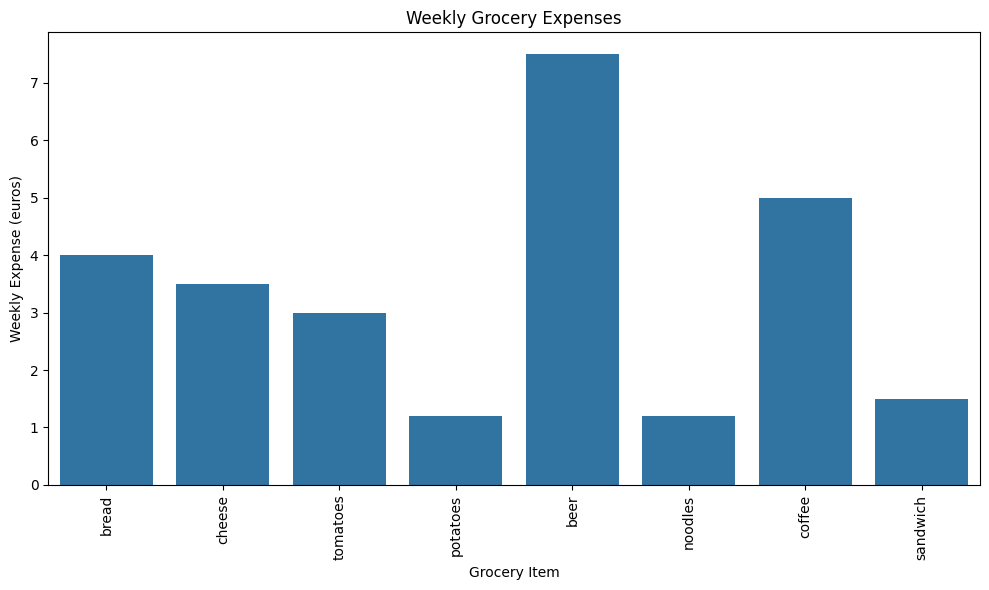

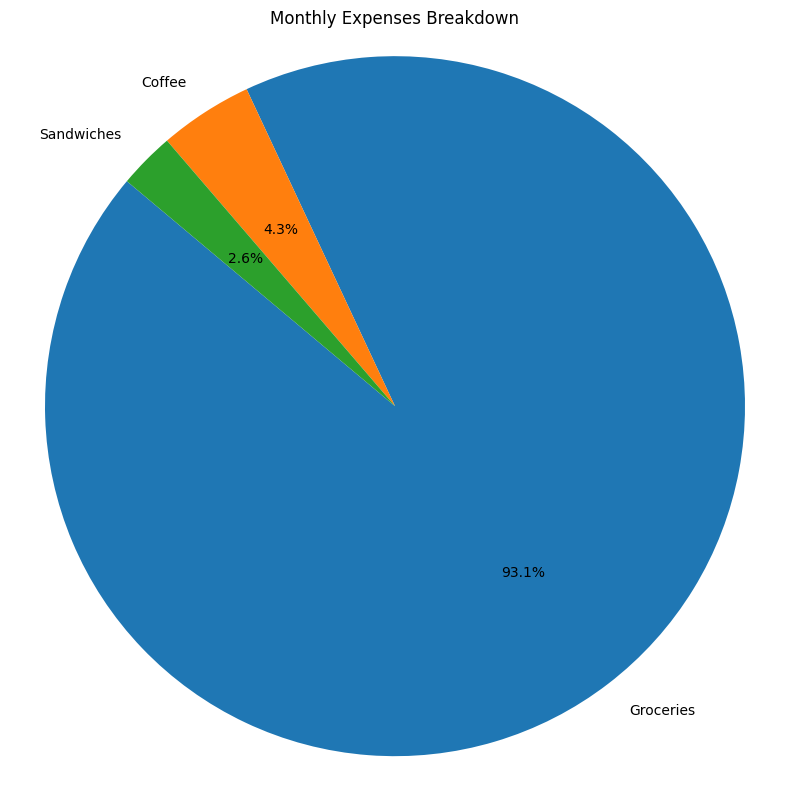

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def get_input():
    """Function to get user input for grocery items, prices, and frequencies."""
    items = []
    prices = []
    frequencies = []

    print("Enter your grocery items (type 'done' when finished):")
    
    while True:
        item = input("Item name: ").strip()
        if item.lower() == 'done':
            break
        try:
            price = float(input(f"Price for {item}: ").strip())
            frequency = int(input(f"Frequency per week for {item}: ").strip())
            items.append(item)
            prices.append(price)
            frequencies.append(frequency)
        except ValueError:
            print("Invalid input. Please enter numerical values for price and frequency.")
    
    return items, np.array(prices), np.array(frequencies)

def calculate_expenses(items, prices, frequencies):
    """Function to calculate weekly and monthly expenses."""
    weekly_expenses = prices * frequencies
    total_weekly_expense = np.sum(weekly_expenses)
    monthly_expenses = total_weekly_expense * 4
    return weekly_expenses, total_weekly_expense, monthly_expenses

def plot_expenses(items, weekly_expenses):
    """Function to plot weekly expenses in a dashboard layout with spacing."""
    data = pd.DataFrame({
        'Item': items,
        'Expense': weekly_expenses
    })
    
    # Create a figure with a GridSpec for precise control over layout
    fig = plt.figure(figsize=(14, 8))
    gs = fig.add_gridspec(1, 2, width_ratios=[2, 2], wspace=0.4)  # Add space between plots

    # Plot the first bar chart
    ax1 = fig.add_subplot(gs[0])
    sns.barplot(x='Item', y='Expense', data=data, palette="viridis", ax=ax1, hue='Item', legend=False)
    ax1.set_title("Weekly Grocery Expenses", fontsize=16)
    ax1.set_xlabel("Items", fontsize=14)
    ax1.set_ylabel("Cost ($)", fontsize=14)
    ax1.tick_params(axis='both', which='major', labelsize=12)
    
    # Plot the second pie chart
    ax2 = fig.add_subplot(gs[1])
    ax2.pie(weekly_expenses, labels=items, autopct='%1.1f%%', colors=sns.color_palette("coolwarm", len(items)))
    ax2.set_title("Distribution of Weekly Grocery Expenses", fontsize=16)

    # Manually adjust layout to prevent overlap
    plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.1)
    plt.show()

def main():
    while True:
        # Get user input
        items, prices, frequencies = get_input()
        
        if not items:
            print("No items entered. Exiting...")
            break
        
        # Calculate expenses
        weekly_expenses, total_weekly_expense, monthly_expenses = calculate_expenses(items, prices, frequencies)
        
        # Display expenses
        print(f"\nWeekly Expenses: ${total_weekly_expense:.2f}")
        print(f"Monthly Expenses: ${monthly_expenses:.2f}")
        
        # Plot expenses
        plot_expenses(items, weekly_expenses)
        
        # Ask user if they want to reset or exit
        choice = input("\nWould you like to enter new data (type 'reset') or exit (type 'exit')? ").strip().lower()
        if choice == 'exit':
            break
        elif choice != 'reset':
            print("Invalid choice. Exiting...")
            break

if __name__ == "__main__":
    main()
